## Exploratory Data Analysis

#### As a business manager, try to find out the weak areas where you can work to make more profit.
#### What all business problems you can derive by exploring the data?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Reading the data

In [3]:
raw_data = pd.read_csv('SampleSuperstore.csv')
raw_data.head() # a peek into the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
(r,c) = raw_data.shape
print('No. of observations: ',r,'\n')
print('No. of features: ',c)

No. of observations:  9994 

No. of features:  13


In [5]:
raw_data.describe(include='all') #get statistical description of columns

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


##### 1)There are no missing values in the entire dataset as the count in all features is maximum i.e 9994.
##### 2)There is only one unique value in Country feature hence its the same as to say that all observations are independent of the country 
##### 3) Postal Code doesn't serve much purpose as City feature is already present.
##### Hence, we can remove the Country and Postal Code features to simplify our analysis

In [6]:
data = raw_data.copy()
data.drop(['Country','Postal Code'], axis=1,inplace=True)

In [7]:
data.isnull().sum() #counting missing values in each feature

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.duplicated().sum() #finding duplicate observations

50

In [9]:
data.drop_duplicates().shape #no. of rows and columns after removing duplicates

(9944, 11)

In [10]:
data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [101]:
print('Numerical features are: ' ) 
print(data.select_dtypes(include='number').columns.tolist(),'\n')
print('Categorical features are: ')
print(data.select_dtypes(include='object').columns.tolist())

Numerical features are: 
['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'] 

Categorical features are: 
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


#### Data Visualization

In [31]:
num_data = data[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']]
num_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


#### From the correlation matrix we can say that the 'Profit' is most affected by two things
#### First is the 'Sales' and the second is the 'Discount'.
#### Hence, we must introspect these two

In [10]:
data_by_category = data[['Sales','Discount','Profit','Category']].groupby(['Category']).sum()

data_by_category

,Sales,Discount,Profit
Category,,,
Furniture,741999.7953,368.89,18451.2728
Office Supplies,719047.0320,947.80,122490.8008
Technology,836154.0330,244.40,145454.9481


#### Technology has very high sales and some discount too and have highest profit.
#### Office supplies has lesser sales than Furniture but have much higher discount and has higher Profit too.

In [11]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

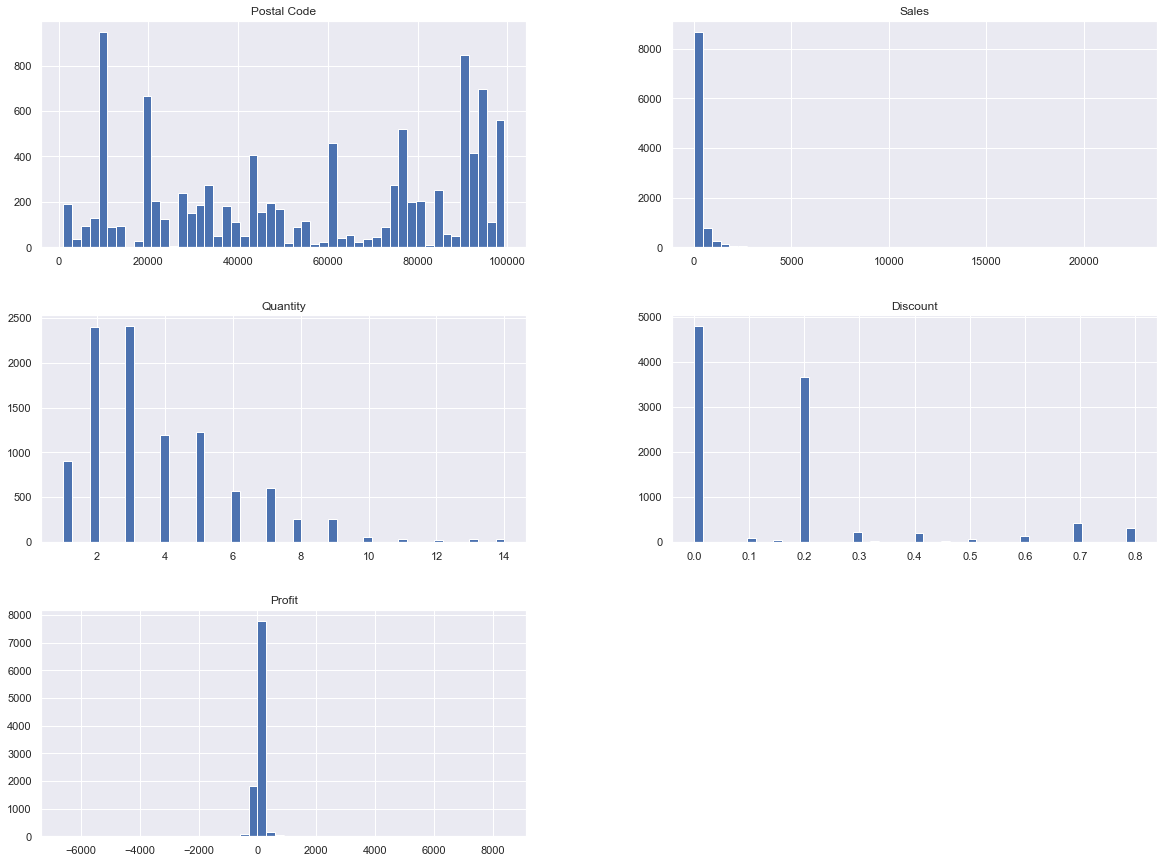

In [12]:
data.hist(bins=50,figsize=(20,15))
plt.show()

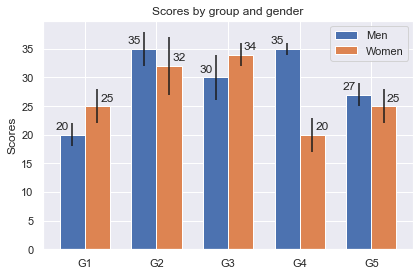

In [43]:
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()


In [13]:
fur_data = data[data['Category']=='Office Supplies']
fur_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [14]:
(fur_data[['Sales']].sum())/fur_data[['Sales']].count()

Sales    119.324101
dtype: float64

In [15]:
off_data = data[data['Category']=='Office Supplies']
(off_data[['Sales']].sum())/off_data[['Sales']].count()

Sales    119.324101
dtype: float64

In [16]:
fur_data[['Discount','Profit']]

,Discount,Profit
2,0.0,6.8714
4,0.2,2.5164
6,0.0,1.9656
8,0.2,5.7825
9,0.0,34.4700
...,...,...
9982,0.0,16.7132
9984,0.0,15.1200
9985,0.0,16.1240
9992,0.0,13.3200


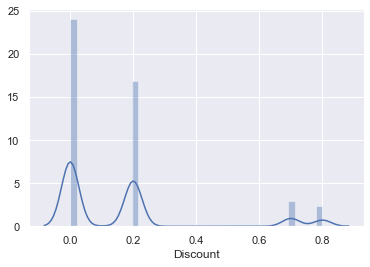

In [17]:
sns.distplot(fur_data['Discount'])
plt.show()

In [18]:
fur_data[['Sub-Category']].value_counts()

Sub-Category
Binders         1523
Paper           1370
Storage          846
Art              796
Appliances       466
Labels           364
Envelopes        254
Fasteners        217
Supplies         190
dtype: int64

In [19]:
fur_data[fur_data['Discount']>0.4][['Sub-Category']].value_counts()

Sub-Category
Binders         613
Appliances       67
dtype: int64

In [20]:
fur_data[fur_data['Discount']<0.4][['Sub-Category']].value_counts()

Sub-Category
Paper           1370
Binders          910
Storage          846
Art              796
Appliances       399
Labels           364
Envelopes        254
Fasteners        217
Supplies         190
dtype: int64

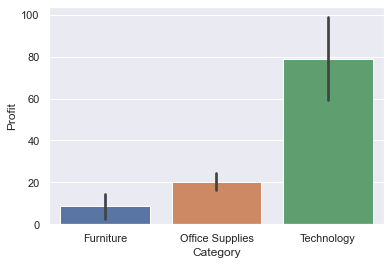

In [21]:
sns.barplot('Category','Profit',data=data)
plt.show()

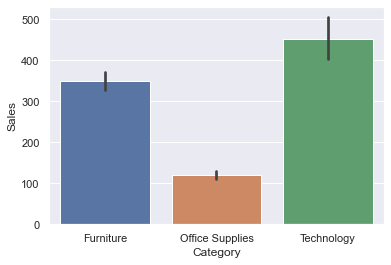

In [22]:
sns.barplot('Category','Sales',data=data)
plt.show()

In [45]:
categories = data['Category'].unique().tolist()
grouped_data = data[['Category','Profit','Sales']].groupby(['Category']).sum()
sales_sum = grouped_data['Sales'].values.flatten().tolist()
profits_sum = grouped_data['Profit'].values.flatten().tolist()
print(categories)
print(sales_sum)
print(profits_sum)

['Furniture', 'Office Supplies', 'Technology']
[741999.7952999998, 719047.0320000029, 836154.0329999966]
[18451.2728, 122490.80080000011, 145454.9480999999]


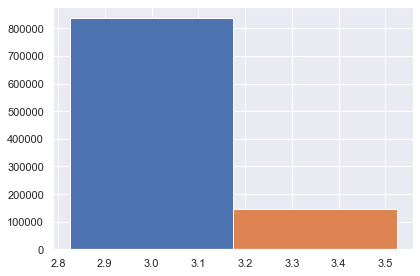

In [51]:
width=0.35
fig,ax = plt.subplots()
r1 = ax.bar(categories,sales_sum,width)
r2 = ax.bar(categories,width,profits_sum,width)
#plt.xticks(X + (width/2) , ("English", "Science", 
"Sports", "History"))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ship Mode v/s Profit')

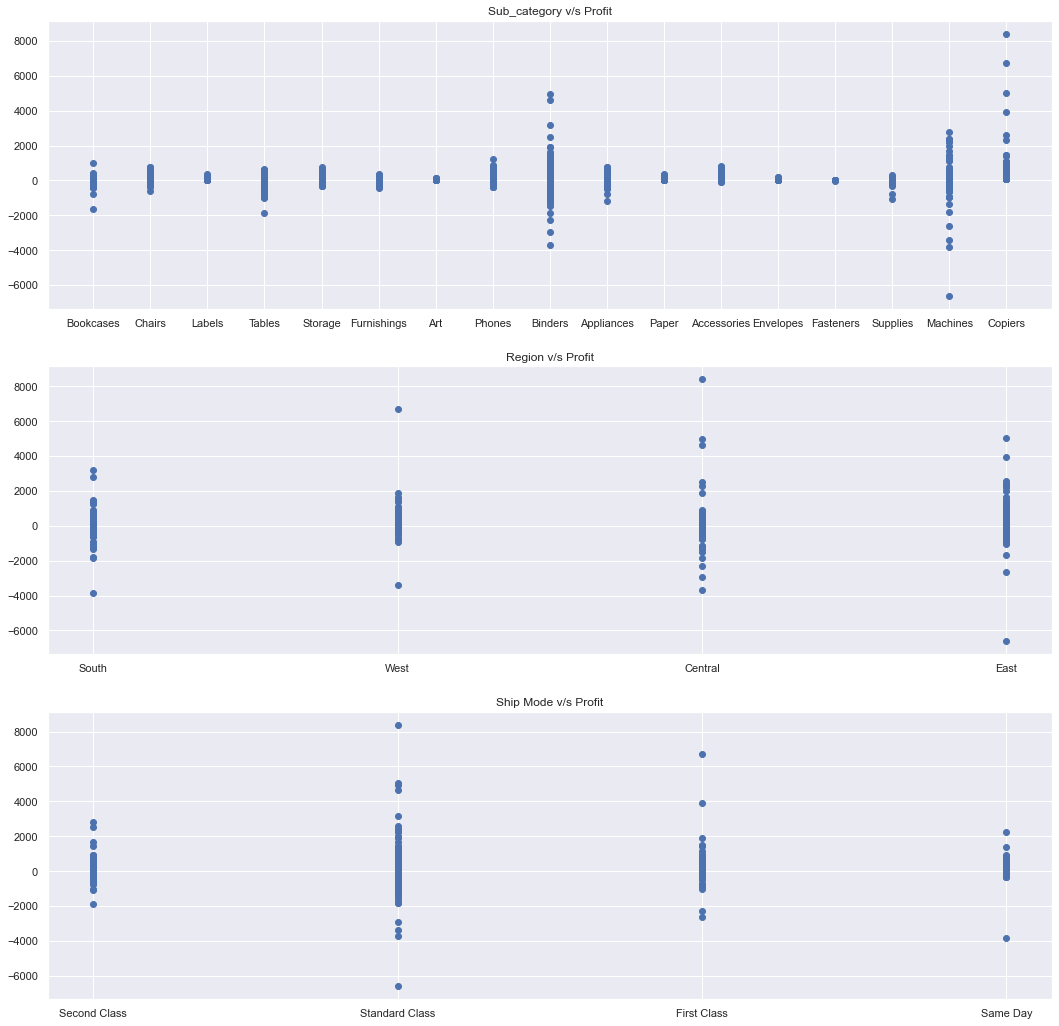

In [71]:
f,(ax1,ax2,ax3) = plt.subplots(3,1,sharey=True,figsize=(18,18))
ax1.scatter(data['Sub-Category'],data['Profit'])
ax1.set_title('Sub_category v/s Profit')
ax2.scatter(data['Region'],data['Profit'])
ax2.set_title('Region v/s Profit')
ax3.scatter(data['Ship Mode'],data['Profit'])
ax3.set_title('Ship Mode v/s Profit')